In [31]:
import scipy.io
from scipy.io import savemat
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import h2o
from h2o.estimators import H2OGeneralizedLowRankEstimator

In [ ]:
h2o.init()
skel = h2o.upload_file('Filename')
glrm_model = H2OGeneralizedLowRankEstimator(k=15, #upper estimate of the data rank
                                            loss="quadratic",
                                            gamma_x=1,#default 0.5
                                            gamma_y=1,
                                            max_iterations=1700,#default 700
                                            recover_svd=True,
                                            init="SVD",
                                            impute_original=True,#default false -
                                            transform="none")#normalizations
glrm_model.train(training_frame=skel)
D=glrm_model.predict(skel).as_data_frame(use_pandas=True).to_numpy()
x=h2o.get_frame(glrm_model._model_json['output']['representation_name'])
y=glrm_model.archetypes()
y_np=np.array(y)
x_np=x.as_data_frame(use_pandas=True).to_numpy()
savemat('DXY.mat',{'D':D,'Y':y_np,'X':x_np})

In [32]:
mat = scipy.io.loadmat('esqueletosveryslow_complete.mat')
esqueletos = np.array(mat["skeldata"])
esqueletos = esqueletos.T
print(esqueletos.shape)

mat2= scipy.io.loadmat('girosmallveryslow2.mp4_features.mat')
features = np.array(mat2["features"])
features = features.T
print(features.shape)

(20793, 55)
(10482, 512)


In [33]:
df_esqueletos = pd.DataFrame(esqueletos)
df_esqueletos



,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,0.0,0.535219,0.358300,0.000000,0.537037,0.364130,0.822732,0.560185,0.364130,0.806063,...,0.000000,0.533976,0.359092,0.000000,0.546296,0.320652,0.411251,0.518519,0.320652,0.572582
1,0.0,0.665630,0.373907,0.000000,0.666667,0.380435,0.831590,0.699074,0.380435,0.817199,...,0.000000,0.663659,0.374847,0.000000,0.675926,0.331522,0.501603,0.648148,0.331522,0.653674
2,0.0,0.133792,0.332460,0.000000,0.134259,0.336957,0.719380,0.166667,0.336957,0.754941,...,0.000000,0.131127,0.332875,0.000000,0.143519,0.298913,0.355162,0.115741,0.293478,0.402077
3,0.0,0.337963,0.331522,0.858296,0.347222,0.396739,0.696229,0.300926,0.385870,0.474027,...,0.709339,0.342593,0.320652,0.819981,0.300926,0.326087,0.536744,0.365741,0.315217,0.676819
4,0.0,0.248592,0.327943,0.000000,0.250000,0.331522,0.715707,0.253155,0.330831,0.000000,...,0.000000,0.248301,0.327362,0.000000,0.249555,0.325428,0.000000,0.240741,0.298913,0.383362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20788,10476.0,0.398148,0.211957,0.137387,0.375000,0.228261,0.803327,0.388889,0.228261,0.728169,...,0.000000,0.376836,0.224020,0.000000,0.384259,0.201087,0.505146,0.370370,0.201087,0.310539
20789,10476.0,0.129506,0.118158,0.000000,0.129630,0.119565,0.292754,0.125000,0.125000,0.213164,...,0.000000,0.129204,0.117996,0.000000,0.129495,0.116377,0.000000,0.130097,0.116060,0.000000
20790,10477.0,0.423247,0.300469,0.000000,0.425926,0.304348,0.434110,0.435185,0.298913,0.433090,...,0.000000,0.423207,0.299423,0.000000,0.427417,0.296700,0.000000,0.407407,0.271739,0.348441
20791,10478.0,0.423880,0.281196,0.000000,0.425926,0.282609,0.475942,0.439815,0.277174,0.419780,...,0.000000,0.422580,0.279460,0.000000,0.430132,0.274896,0.000000,0.407407,0.255435,0.400215


In [34]:
df_count = pd.DataFrame(df_esqueletos[0].value_counts())

df_frames_skeletons_poucos = df_count[(df_count[0]<=2)]
df_frames_skeletons_poucos["n_esqueletos"] = df_frames_skeletons_poucos[0]
df_frames_skeletons_poucos["frames"]=df_frames_skeletons_poucos.index
df_frames_skeletons_poucos = df_frames_skeletons_poucos.drop(0,axis="columns")
df_frames_skeletons_poucos.reset_index(inplace=True)
df_frames_skeletons_poucos = df_frames_skeletons_poucos.drop("index",axis="columns")
df_frames_skeletons_poucos 


/var/folders/kg/stmtsz1j003486dxh5zvrnjr0000gn/T/ipykernel_2394/2421977204.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_frames_skeletons_poucos["n_esqueletos"] = df_frames_skeletons_poucos[0]
/var/folders/kg/stmtsz1j003486dxh5zvrnjr0000gn/T/ipykernel_2394/2421977204.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_frames_skeletons_poucos["frames"]=df_frames_skeletons_poucos.index


,n_esqueletos,frames
0,2,8269.0
1,2,8268.0
2,2,8655.0
3,2,7939.0
4,2,8267.0
...,...,...
4069,1,4895.0
4070,1,4897.0
4071,1,4898.0
4072,1,4902.0


In [35]:
df_frames_skeletons_muitos = df_count[(df_count[0]>2)]
df_frames_skeletons_muitos["n_esqueletos"] = df_frames_skeletons_muitos[0]
df_frames_skeletons_muitos["frames"]=df_frames_skeletons_muitos.index
df_frames_skeletons_muitos = df_frames_skeletons_muitos.drop(0,axis="columns")
df_frames_skeletons_muitos.reset_index(inplace=True)
df_frames_skeletons_muitos = df_frames_skeletons_muitos.drop("index",axis="columns")
df_frames_skeletons_muitos

/var/folders/kg/stmtsz1j003486dxh5zvrnjr0000gn/T/ipykernel_2394/1377190586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_frames_skeletons_muitos["n_esqueletos"] = df_frames_skeletons_muitos[0]
/var/folders/kg/stmtsz1j003486dxh5zvrnjr0000gn/T/ipykernel_2394/1377190586.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_frames_skeletons_muitos["frames"]=df_frames_skeletons_muitos.index


,n_esqueletos,frames
0,26,6237.0
1,20,6249.0
2,18,6238.0
3,18,6245.0
4,18,6235.0
...,...,...
3372,3,2962.0
3373,3,2959.0
3374,3,7220.0
3375,3,3621.0


In [36]:
frames_esqueletos = df_esqueletos[[0]]
frames_esqueletos = np.array(frames_esqueletos,dtype=int)
frames_esqueletos = np.unique(frames_esqueletos)
frames_esqueletos.shape


(7451,)

In [37]:
df_esqueletos.describe()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
count,20793.000000,20793.000000,20793.000000,20793.000000,20793.000000,20793.000000,20793.000000,20793.000000,20793.000000,20793.000000,...,20793.000000,20793.000000,20793.000000,20793.000000,20793.000000,20793.000000,20793.000000,20793.000000,20793.000000,20793.000000
mean,5431.662867,0.504565,0.401231,0.387682,0.513252,0.426753,0.517440,0.500961,0.426980,0.453515,...,0.308506,0.507238,0.394053,0.342184,0.508926,0.397792,0.231289,0.513774,0.388982,0.345983
std,3190.901487,0.235435,0.144883,0.298030,0.236650,0.144953,0.214890,0.237937,0.145467,0.241585,...,0.294578,0.235356,0.146034,0.299853,0.236070,0.145792,0.227842,0.235662,0.145511,0.258634
min,0.000000,-0.001065,0.015167,0.000000,0.013889,0.021739,0.000000,0.007707,0.016304,0.000000,...,0.000000,0.011824,0.016304,0.000000,0.011554,0.008942,0.000000,0.012050,0.014315,0.000000
25%,2395.000000,0.342593,0.309783,0.000000,0.348765,0.336957,0.369547,0.337963,0.335389,0.288687,...,0.000000,0.342598,0.298913,0.000000,0.347024,0.304348,0.000000,0.351240,0.293478,0.130762
50%,5808.000000,0.506291,0.385870,0.395170,0.513889,0.413043,0.562706,0.504630,0.413043,0.500315,...,0.260888,0.509259,0.378290,0.319676,0.513889,0.383057,0.195310,0.513889,0.371822,0.341727
75%,8239.000000,0.675926,0.472826,0.663671,0.685185,0.500000,0.689950,0.675926,0.500000,0.644373,...,0.582908,0.679793,0.467391,0.632581,0.680556,0.468880,0.396093,0.685185,0.461462,0.559882
max,10480.000000,0.983223,0.951087,0.996066,0.986111,0.972826,0.918383,0.984811,0.973260,0.989993,...,0.991953,0.986111,0.959041,0.993547,0.984954,0.966229,0.948566,0.990618,0.968297,0.955967


In [9]:
df_features = pd.DataFrame(features)
df_features



,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.238704,1.412719,0.084991,0.489959,0.024204,0.201579,0.512111,0.000000,0.000000,0.195528,...,0.002634,0.119100,0.011201,0.573702,0.206575,0.000000,0.134458,0.051132,0.283723,0.873555
1,0.182419,1.420491,0.087123,0.382720,0.069056,0.407248,0.285244,0.000000,0.000000,0.137644,...,0.003302,0.006480,0.017636,0.419101,0.323237,0.000000,0.130446,0.062828,0.133925,0.687876
2,0.094744,2.487180,0.165047,0.940108,0.026079,0.615811,0.262128,0.000000,0.045723,0.258087,...,0.029864,0.065459,0.014594,0.401667,0.000000,0.000000,0.200238,0.107999,0.299722,1.011234
3,0.156000,1.866311,0.237712,1.070874,0.135809,0.549944,0.219501,0.000000,0.092136,0.243884,...,0.053629,0.344218,0.033171,0.619524,0.019305,0.092939,0.023063,0.163098,0.503656,1.233997
4,0.205070,1.677203,0.188901,0.273898,0.187620,0.199844,0.046013,0.012639,0.000000,0.125979,...,0.019925,0.144598,0.132044,0.704292,0.117443,0.011418,0.295942,0.015860,0.077060,1.947160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10477,0.058473,1.694426,0.024283,0.294916,0.035983,0.075774,0.839658,0.061179,0.314814,0.044305,...,0.026219,0.183548,0.381235,0.081931,0.015383,0.090570,0.167701,0.681646,0.341969,0.067271
10478,0.329494,1.567268,0.001213,0.000000,0.095408,0.456564,0.748642,0.001807,0.054131,0.148627,...,0.207566,0.248900,0.132114,0.184589,0.000000,0.208307,0.004289,0.470031,1.294317,0.049922
10479,0.453960,1.956252,0.000000,0.000000,0.000000,0.000000,0.639030,0.041061,0.010595,0.170991,...,0.142860,1.054349,0.610057,0.393970,0.000000,0.017236,0.117590,0.218750,0.669652,0.344435
10480,0.300397,1.088323,0.000000,0.010296,0.060238,0.000000,0.894582,0.014385,0.000000,0.240617,...,0.335973,0.468302,0.393050,0.887019,0.000000,0.043326,0.154453,0.515388,1.204615,0.112983


In [290]:
df_features.describe()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
count,10482.000000,10482.000000,10482.000000,10482.000000,10482.000000,10482.000000,10482.000000,10482.000000,10482.000000,10482.000000,...,10482.000000,10482.000000,10482.000000,10482.000000,10482.000000,10482.000000,10482.000000,10482.000000,10482.000000,10482.000000
mean,0.434176,0.899493,0.152605,0.215864,0.191215,0.239702,0.321918,0.127132,0.088968,0.271504,...,0.060557,0.231592,0.186023,0.329416,0.026983,0.076138,0.462238,0.210435,0.413983,0.384742
std,0.369075,0.762306,0.191924,0.308035,0.216478,0.300216,0.323074,0.174135,0.147366,0.296459,...,0.084270,0.229477,0.203084,0.353020,0.069205,0.102160,0.502506,0.256347,0.439540,0.367298
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.155562,0.286819,0.018871,0.001315,0.038420,0.032602,0.074454,0.011928,0.000000,0.057427,...,0.003910,0.065958,0.046195,0.057779,0.000000,0.012162,0.122934,0.030047,0.102575,0.121061
50%,0.341913,0.731521,0.085823,0.073783,0.120085,0.135302,0.226264,0.063965,0.028965,0.174928,...,0.030785,0.164048,0.116745,0.219061,0.000000,0.041531,0.304879,0.119606,0.277871,0.292718
75%,0.614716,1.339303,0.212891,0.321431,0.268911,0.337629,0.470390,0.176769,0.111516,0.385401,...,0.083448,0.319960,0.255823,0.484703,0.022315,0.099728,0.624291,0.296512,0.564720,0.540962
max,2.815443,4.901807,1.855415,2.440010,2.131860,3.053455,3.716725,1.895877,1.628720,2.923916,...,1.065213,1.786708,1.452614,2.894833,1.262055,1.220362,4.936285,2.838058,4.020823,4.191032


In [38]:
scaler = MinMaxScaler()
scaler.fit(df_features)
df_features_scaled = scaler.transform(df_features)
df_features_scaled = pd.DataFrame(df_features_scaled)
df_features_scaled



,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.084784,0.288204,0.045807,0.200802,0.011353,0.066017,0.137786,0.000000,0.000000,0.066872,...,0.002473,0.066659,0.007711,0.198181,0.163681,0.000000,0.027239,0.018016,0.070563,0.208434
1,0.064792,0.289789,0.046956,0.156852,0.032393,0.133373,0.076746,0.000000,0.000000,0.047075,...,0.003100,0.003627,0.012141,0.144775,0.256120,0.000000,0.026426,0.022138,0.033308,0.164131
2,0.033652,0.507401,0.088954,0.385289,0.012233,0.201677,0.070527,0.000000,0.028073,0.088268,...,0.028036,0.036636,0.010047,0.138753,0.000000,0.000000,0.040564,0.038054,0.074542,0.241285
3,0.055409,0.380739,0.128118,0.438881,0.063704,0.180105,0.059058,0.000000,0.056569,0.083410,...,0.050346,0.192655,0.022835,0.214010,0.015297,0.076157,0.004672,0.057468,0.125262,0.294437
4,0.072838,0.342160,0.101810,0.112253,0.088008,0.065448,0.012380,0.006667,0.000000,0.043086,...,0.018706,0.080930,0.090901,0.243293,0.093057,0.009357,0.059952,0.005588,0.019165,0.464602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10477,0.020769,0.345674,0.013088,0.120867,0.016879,0.024816,0.225913,0.032270,0.193289,0.015153,...,0.024614,0.102730,0.262448,0.028303,0.012189,0.074215,0.033973,0.240180,0.085050,0.016051
10478,0.117031,0.319733,0.000654,0.000000,0.044753,0.149524,0.201425,0.000953,0.033235,0.050831,...,0.194858,0.139306,0.090949,0.063765,0.000000,0.170693,0.000869,0.165617,0.321903,0.011912
10479,0.161239,0.399088,0.000000,0.000000,0.000000,0.000000,0.171934,0.021658,0.006505,0.058480,...,0.134114,0.590107,0.419971,0.136094,0.000000,0.014124,0.023822,0.077077,0.166546,0.082184
10480,0.106696,0.222025,0.000000,0.004220,0.028256,0.000000,0.240691,0.007587,0.000000,0.082293,...,0.315405,0.262103,0.270581,0.306415,0.000000,0.035503,0.031289,0.181599,0.299594,0.026958


In [39]:
df_esqueletos_sem_frame=df_esqueletos.drop(0,axis="columns")
scaler.fit(df_esqueletos_sem_frame)
df_esqueletos_sem_frame_scaled= scaler.transform(df_esqueletos_sem_frame)
df_esqueletos_sem_frame_scaled = pd.DataFrame(df_esqueletos_sem_frame_scaled)
df_esqueletos_sem_frame_scaled

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,0.544844,0.366627,0.000000,0.538095,0.360000,0.895849,0.565424,0.363471,0.814211,0.583137,...,0.000000,0.535933,0.363609,0.000000,0.549355,0.325618,0.433550,0.517561,0.321115,0.598956
1,0.677337,0.383302,0.000000,0.671429,0.377143,0.905493,0.707568,0.380509,0.825460,0.715767,...,0.000000,0.669038,0.380321,0.000000,0.682527,0.336973,0.528802,0.650030,0.332508,0.683783
2,0.137009,0.339017,0.000000,0.123810,0.331429,0.783312,0.162685,0.335075,0.762573,0.180509,...,0.000000,0.122452,0.335799,0.000000,0.135570,0.302909,0.374420,0.105962,0.292630,0.420597
3,0.344440,0.338014,0.861687,0.342857,0.394286,0.758103,0.300090,0.386188,0.478819,0.289456,...,0.715093,0.339498,0.322835,0.825307,0.297279,0.331295,0.565848,0.361437,0.315418,0.707994
4,0.253642,0.334191,0.000000,0.242857,0.325714,0.779312,0.251199,0.328674,0.000000,0.249973,...,0.000000,0.242718,0.329952,0.000000,0.244504,0.330607,0.000000,0.233699,0.298327,0.401021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20788,0.405585,0.210263,0.137929,0.371429,0.217143,0.874719,0.390114,0.221490,0.735530,0.407875,...,0.000000,0.374645,0.220333,0.000000,0.382890,0.200718,0.532536,0.366168,0.195782,0.324843
20789,0.132655,0.110042,0.000000,0.119048,0.102857,0.318771,0.120042,0.113585,0.215318,0.114194,...,0.000000,0.120478,0.107869,0.000000,0.121164,0.112228,0.000000,0.120632,0.106654,0.000000
20790,0.431085,0.304836,0.000000,0.423810,0.297143,0.472689,0.437495,0.295320,0.437468,0.455243,...,0.000000,0.422240,0.300315,0.000000,0.427227,0.300597,0.000000,0.404016,0.269842,0.364491
20791,0.431728,0.284243,0.000000,0.423810,0.274286,0.518239,0.442233,0.272603,0.424023,0.459980,...,0.000000,0.421597,0.279141,0.000000,0.430016,0.277820,0.000000,0.404016,0.252751,0.418650


In [40]:
df_esqueletos_sem_frame_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,20793.000000,20793.000000,20793.000000,20793.000000,20793.000000,20793.000000,20793.000000,20793.000000,20793.000000,20793.000000,...,20793.000000,20793.000000,20793.000000,20793.000000,20793.000000,20793.000000,20793.000000,20793.000000,20793.000000,20793.000000
mean,0.513701,0.412497,0.389213,0.513631,0.425843,0.563425,0.504812,0.429148,0.458099,0.500283,...,0.311009,0.508489,0.400694,0.344406,0.510963,0.406200,0.243830,0.512712,0.392740,0.361919
std,0.239193,0.154802,0.299207,0.243411,0.152407,0.233987,0.243513,0.152011,0.244027,0.242819,...,0.296968,0.241568,0.154904,0.301801,0.242521,0.152297,0.240196,0.240824,0.152530,0.270547
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.349143,0.314787,0.000000,0.344444,0.331429,0.402389,0.337995,0.333437,0.291605,0.327350,...,0.000000,0.339504,0.299775,0.000000,0.344637,0.308586,0.000000,0.346618,0.292630,0.136785
50%,0.515455,0.396083,0.396731,0.514286,0.411429,0.612714,0.508567,0.414584,0.505373,0.506456,...,0.263005,0.510564,0.383973,0.321753,0.516062,0.390808,0.205900,0.512830,0.374752,0.357467
75%,0.687797,0.488994,0.666292,0.690476,0.502857,0.751267,0.683877,0.505452,0.650886,0.677872,...,0.587637,0.685598,0.478487,0.636690,0.687283,0.480460,0.417571,0.687878,0.468717,0.585671
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
df2=df_esqueletos
for i in range(1,54):
    min_thresold, max_thresold = df_esqueletos[i].quantile([0.001,0.999])
    df2=df2[(df_esqueletos[i]<min_thresold) & (df_esqueletos[i]>max_thresold)]
df2

df2=df2.drop(0,axis="columns")

scaler.fit(df2)
df2_scaled= scaler.transform(df2)
df2_scaled= pd.DataFrame(df2_scaled)
df2_scaled 





/var/folders/kg/stmtsz1j003486dxh5zvrnjr0000gn/T/ipykernel_2394/1268088776.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2=df2[(df_esqueletos[i]<min_thresold) & (df_esqueletos[i]>max_thresold)]


ValueError: Found array with 0 sample(s) (shape=(0, 54)) while a minimum of 1 is required by MinMaxScaler.

In [41]:
scaler.fit(df_esqueletos)
df_esqueletos_scaled= scaler.transform(df_esqueletos)
df_esqueletos_scaled = pd.DataFrame(df_esqueletos_scaled)
df_esqueletos_scaled

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,0.000000,0.544844,0.366627,0.000000,0.538095,0.360000,0.895849,0.565424,0.363471,0.814211,...,0.000000,0.535933,0.363609,0.000000,0.549355,0.325618,0.433550,0.517561,0.321115,0.598956
1,0.000000,0.677337,0.383302,0.000000,0.671429,0.377143,0.905493,0.707568,0.380509,0.825460,...,0.000000,0.669038,0.380321,0.000000,0.682527,0.336973,0.528802,0.650030,0.332508,0.683783
2,0.000000,0.137009,0.339017,0.000000,0.123810,0.331429,0.783312,0.162685,0.335075,0.762573,...,0.000000,0.122452,0.335799,0.000000,0.135570,0.302909,0.374420,0.105962,0.292630,0.420597
3,0.000000,0.344440,0.338014,0.861687,0.342857,0.394286,0.758103,0.300090,0.386188,0.478819,...,0.715093,0.339498,0.322835,0.825307,0.297279,0.331295,0.565848,0.361437,0.315418,0.707994
4,0.000000,0.253642,0.334191,0.000000,0.242857,0.325714,0.779312,0.251199,0.328674,0.000000,...,0.000000,0.242718,0.329952,0.000000,0.244504,0.330607,0.000000,0.233699,0.298327,0.401021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20788,0.999618,0.405585,0.210263,0.137929,0.371429,0.217143,0.874719,0.390114,0.221490,0.735530,...,0.000000,0.374645,0.220333,0.000000,0.382890,0.200718,0.532536,0.366168,0.195782,0.324843
20789,0.999618,0.132655,0.110042,0.000000,0.119048,0.102857,0.318771,0.120042,0.113585,0.215318,...,0.000000,0.120478,0.107869,0.000000,0.121164,0.112228,0.000000,0.120632,0.106654,0.000000
20790,0.999714,0.431085,0.304836,0.000000,0.423810,0.297143,0.472689,0.437495,0.295320,0.437468,...,0.000000,0.422240,0.300315,0.000000,0.427227,0.300597,0.000000,0.404016,0.269842,0.364491
20791,0.999809,0.431728,0.284243,0.000000,0.423810,0.274286,0.518239,0.442233,0.272603,0.424023,...,0.000000,0.421597,0.279141,0.000000,0.430016,0.277820,0.000000,0.404016,0.252751,0.418650


In [296]:
df_features_without_esqueletos = df_features_scaled

for i in frames_esqueletos:
    df_features_without_esqueletos = df_features_without_esqueletos.drop(i,axis="rows")

df_features_without_esqueletos

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
13,0.152039,0.321805,0.036467,0.140092,0.028070,0.000000,0.022404,0.002416,0.004216,0.189575,...,0.039022,0.034630,0.008694,0.268827,0.002298,0.076774,0.071453,0.010865,0.036067,0.161021
14,0.203852,0.002268,0.065026,0.056609,0.040675,0.025548,0.040824,0.059506,0.000000,0.030416,...,0.011301,0.000000,0.149257,0.104086,0.022234,0.037678,0.121993,0.012594,0.016395,0.026750
15,0.215100,0.000994,0.323237,0.000000,0.026552,0.071645,0.106017,0.056502,0.000000,0.074191,...,0.022327,0.016569,0.083275,0.161359,0.000000,0.012584,0.121719,0.000000,0.020994,0.058817
16,0.143017,0.010732,0.479391,0.000000,0.004786,0.119116,0.087414,0.174898,0.000000,0.104321,...,0.063640,0.104800,0.200642,0.231643,0.000000,0.065499,0.099250,0.022959,0.004944,0.115211
17,0.151984,0.015855,0.225723,0.001565,0.012334,0.096140,0.070494,0.205799,0.000000,0.094496,...,0.169525,0.057886,0.096963,0.277259,0.051798,0.007968,0.043553,0.017527,0.005666,0.029072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10388,0.034310,0.256641,0.055503,0.218393,0.028220,0.001145,0.112293,0.041077,0.121045,0.077292,...,0.072348,0.275119,0.035282,0.293590,0.094424,0.111904,0.051297,0.071207,0.055490,0.013697
10469,0.209345,0.281503,0.126261,0.142752,0.045497,0.044777,0.087310,0.000000,0.286456,0.023852,...,0.015574,0.383971,0.189624,0.083072,0.000000,0.006193,0.026708,0.040827,0.106963,0.133012
10471,0.125725,0.221260,0.083343,0.117244,0.114769,0.014152,0.295979,0.019626,0.026732,0.046952,...,0.001381,0.384946,0.407279,0.012891,0.047623,0.000000,0.027783,0.081422,0.065380,0.104440
10479,0.161239,0.399088,0.000000,0.000000,0.000000,0.000000,0.171934,0.021658,0.006505,0.058480,...,0.134114,0.590107,0.419971,0.136094,0.000000,0.014124,0.023822,0.077077,0.166546,0.082184


In [20]:
pca = PCA(n_components=0.90)
esqueletos_pca = pca.fit_transform(df_esqueletos_sem_frame_scaled
)

pca.explained_variance_ratio_

array([0.38203672, 0.19920473, 0.14265818, 0.0904886 , 0.04711386,
       0.03025013, 0.01915458])

In [21]:
pca.n_components_

7

In [42]:
# Try or not to use the T-SNE algorithm to reduce the complexity of our features if - you doesnt use this cell use the next one.

tsne = TSNE(n_components=2)
esqueletos_pca = tsne.fit_transform(df_esqueletos_sem_frame_scaled)

/Users/natanviana/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/natanviana/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [43]:
esqueletos_pca = pd.DataFrame(esqueletos_pca)
esqueletos_pca




,0,1
0,5.727832,-6.681876
1,-1.426003,-11.904368
2,29.707346,27.598030
3,40.404095,-6.898496
4,29.180489,45.797050
...,...,...
20788,28.026056,17.186508
20789,20.035412,60.241642
20790,1.701576,19.023964
20791,-17.480854,41.927048


In [44]:
scaler.fit(esqueletos_pca)
esqueletos_pca_scaled= scaler.transform(esqueletos_pca)
esqueletos_pca_scaled = pd.DataFrame(esqueletos_pca_scaled)
esqueletos_pca_scaled

,0,1
0,0.558957,0.433536
1,0.510460,0.400119
2,0.721519,0.652884
3,0.794034,0.432150
4,0.717947,0.769335
...,...,...
20788,0.710121,0.586264
20789,0.655951,0.861762
20790,0.531662,0.598021
20791,0.401621,0.744572


In [45]:
k_range = range(1,10)
sse = []

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(esqueletos_pca_scaled)
    sse.append(km.inertia_)

sse

[2235.494140625,
 1417.87744140625,
 880.150390625,
 629.644287109375,
 516.542236328125,
 425.5579528808594,
 347.32794189453125,
 304.04815673828125,
 270.8544921875]

Text(0.5, 1.0, 'K Value for Skeletons')

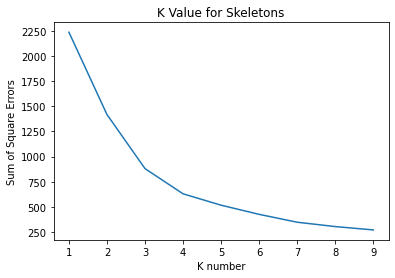

In [46]:
plt.plot(k_range,sse)
plt.xlabel("K number")
plt.ylabel("Sum of Square Errors")
plt.title("K Value for Skeletons")

In [53]:
km = KMeans(n_clusters=4)
cluster_esqueletos_predict = km.fit_predict(esqueletos_pca_scaled)
esqueletos_pca_scaled["cluster"] = cluster_esqueletos_predict
esqueletos_pca_scaled["frame"] = df_esqueletos[[0]]
esqueletos_pca = esqueletos_pca_scaled
esqueletos_pca



/Users/natanviana/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,0,1,cluster,frame
0,0.558957,0.433536,3,0.0
1,0.510460,0.400119,3,0.0
2,0.721519,0.652884,3,0.0
3,0.794034,0.432150,3,0.0
4,0.717947,0.769335,3,0.0
...,...,...,...,...
20788,0.710121,0.586264,2,10476.0
20789,0.655951,0.861762,2,10476.0
20790,0.531662,0.598021,2,10477.0
20791,0.401621,0.744572,2,10478.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


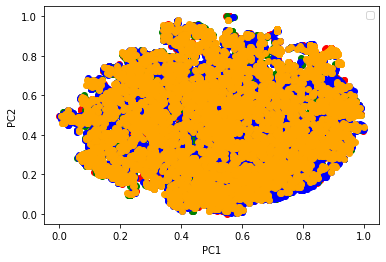

In [54]:
df1 = esqueletos_pca[esqueletos_pca.cluster==0]
df2 = esqueletos_pca[esqueletos_pca.cluster==1]
df3 = esqueletos_pca[esqueletos_pca.cluster==2]
df4 = esqueletos_pca[esqueletos_pca.cluster==3]


plt.scatter(df1[0],df1[1],color="red")
plt.scatter(df2[0],df2[1],color="green")
plt.scatter(df3[0],df3[1],color="blue")
plt.scatter(df4[0],df4[1],color="orange")



plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()

In [305]:
pca = PCA(n_components=0.95)
features_without_esqueletos_pca = pca.fit_transform(df_features_without_esqueletos)

pca.explained_variance_ratio_

array([0.11348746, 0.05635303, 0.04688107, 0.04400972, 0.03854931,
       0.03020989, 0.02577408, 0.02413994, 0.02207534, 0.01739915,
       0.01683968, 0.0157711 , 0.01387233, 0.01360727, 0.01304402,
       0.01197575, 0.01140814, 0.01032444, 0.00965054, 0.00900205,
       0.00841167, 0.00760542, 0.00731256, 0.00707207, 0.00689718,
       0.00671707, 0.00648209, 0.00617686, 0.00610999, 0.00584326,
       0.0057087 , 0.00562825, 0.00556526, 0.00521619, 0.00512511,
       0.00490904, 0.00479022, 0.00465742, 0.00449744, 0.00434322,
       0.00425742, 0.00406242, 0.00395221, 0.00388987, 0.0038016 ,
       0.00372841, 0.00364594, 0.00356144, 0.00349647, 0.00340807,
       0.00329272, 0.00318726, 0.00314889, 0.00313574, 0.00309337,
       0.00303414, 0.00291173, 0.00288883, 0.00280924, 0.00275437,
       0.00272389, 0.00270975, 0.00267373, 0.00258269, 0.00256866,
       0.00251398, 0.00244213, 0.0024322 , 0.00239213, 0.00233751,
       0.00227243, 0.00223679, 0.00219364, 0.00217095, 0.00215

In [306]:
pca.n_components_

273

In [307]:
features_without_esqueletos_pca = pd.DataFrame(features_without_esqueletos_pca)
features_without_esqueletos_pca

,0,1,2,3,4,5,6,7,8,9,...,263,264,265,266,267,268,269,270,271,272
0,1.193304,-0.339730,-0.819892,-0.005225,0.320044,-0.077802,-0.655200,0.028021,1.050476,0.369340,...,-0.037031,-0.055807,-0.001150,-0.016504,0.001303,-0.080798,-0.066516,0.021115,-0.039514,0.266856
1,-0.505860,0.156339,-0.336225,0.232888,0.136359,-0.216500,0.167635,-0.212559,0.205519,0.204192,...,0.025055,0.002314,0.018682,0.087684,0.008483,-0.019716,0.027879,0.021176,-0.058779,0.018499
2,-0.515690,0.161184,-0.296652,0.210485,0.010187,-0.169260,0.042218,0.095529,0.109048,0.472001,...,0.073712,0.018841,-0.035102,0.000389,-0.024026,-0.064190,0.034476,-0.002285,-0.044817,0.050464
3,-0.561845,0.238939,-0.315027,0.194832,-0.095329,-0.040067,0.030124,0.069377,-0.062410,0.687368,...,0.092171,-0.013193,-0.075132,0.011527,-0.043472,0.034581,0.012053,-0.004258,-0.010392,-0.047433
4,-0.521311,-0.134343,-0.337404,0.279045,-0.306332,0.135134,0.237528,0.088491,0.019010,0.550767,...,0.002401,0.028693,-0.038266,0.063508,0.082698,0.020125,0.045400,0.000671,0.042564,0.024497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,2.096721,-0.217560,-1.223591,-0.651406,-0.420263,-0.358062,-0.079144,0.489312,0.247771,-0.250362,...,0.061953,-0.065205,-0.073971,0.064942,-0.002629,0.051194,0.028829,0.122627,-0.032824,-0.001589
3027,1.504546,-0.024203,-0.417524,0.026787,0.322698,-0.142813,-0.159130,0.331734,0.708134,-0.427578,...,0.045300,-0.078154,-0.060405,-0.010722,0.054247,-0.047297,0.066592,-0.032294,0.050016,-0.021383
3028,1.671879,0.189519,-0.427993,-0.030123,0.209396,0.084270,-0.367787,0.255185,0.886718,-0.330017,...,0.114091,0.057509,0.037314,-0.036483,-0.107582,0.013078,-0.005392,-0.017340,0.092957,0.036112
3029,1.390475,0.303470,1.141386,-0.017666,-0.431751,0.104774,0.018356,-0.160373,0.672688,-1.016475,...,-0.083014,0.009792,-0.060608,-0.032747,-0.065802,0.055301,0.047807,0.005186,-0.052672,-0.017881


In [308]:
scaler = MinMaxScaler()
scaler.fit(features_without_esqueletos_pca)
features_without_esqueletos_pca = scaler.transform(features_without_esqueletos_pca)
features_without_esqueletos_pca = pd.DataFrame(features_without_esqueletos_pca)
features_without_esqueletos_pca

,0,1,2,3,4,5,6,7,8,9,...,263,264,265,266,267,268,269,270,271,272
0,0.553306,0.389580,0.203873,0.436679,0.461123,0.450029,0.236551,0.338029,0.861521,0.558457,...,0.373109,0.354174,0.428135,0.456377,0.494818,0.226214,0.292554,0.530568,0.391616,1.000000
1,0.182860,0.522672,0.326735,0.520878,0.402012,0.396489,0.556296,0.259191,0.556936,0.492801,...,0.500224,0.486185,0.477008,0.730446,0.512354,0.360330,0.515002,0.530728,0.340369,0.478846
2,0.180717,0.523971,0.336788,0.512956,0.361409,0.414724,0.507560,0.360152,0.522161,0.599271,...,0.599846,0.523725,0.344461,0.500814,0.432951,0.262681,0.530548,0.468964,0.377512,0.545921
3,0.170654,0.544832,0.332120,0.507421,0.327454,0.464596,0.502861,0.351582,0.460355,0.684891,...,0.637639,0.450964,0.245808,0.530113,0.385454,0.479550,0.477707,0.463770,0.469085,0.340492
4,0.179491,0.444684,0.326436,0.537200,0.259552,0.532228,0.583456,0.357845,0.489705,0.630585,...,0.453843,0.546102,0.336664,0.666850,0.693623,0.447809,0.556291,0.476747,0.609951,0.491431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,0.750266,0.422357,0.101324,0.208183,0.222888,0.341842,0.460400,0.489195,0.572167,0.312089,...,0.575771,0.332828,0.248670,0.670622,0.485212,0.516027,0.517241,0.797807,0.409412,0.436692
3027,0.621162,0.474233,0.306084,0.447999,0.461977,0.424933,0.429319,0.437556,0.738116,0.241636,...,0.541676,0.303416,0.282103,0.471586,0.624132,0.299773,0.606231,0.389963,0.629776,0.395156
3028,0.657643,0.531573,0.303424,0.427875,0.425516,0.512593,0.348237,0.412471,0.802491,0.280422,...,0.682518,0.611553,0.522928,0.403819,0.228867,0.432336,0.436597,0.429332,0.744004,0.515804
3029,0.596293,0.562146,0.702081,0.432280,0.219191,0.520508,0.498288,0.276293,0.725339,0.007515,...,0.278964,0.503171,0.281602,0.413648,0.330915,0.525045,0.561963,0.488634,0.356614,0.402504


In [309]:
k_range = range(1,10)
sse = []

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(features_without_esqueletos_pca)
    sse.append(km.inertia_)
sse

[11145.37890625,
 11072.685546875,
 11014.2822265625,
 10966.45703125,
 10915.240234375,
 10913.306640625,
 10857.2421875,
 10839.990234375,
 10791.328125]

Text(0.5, 1.0, 'K Value for features without esqueletos')

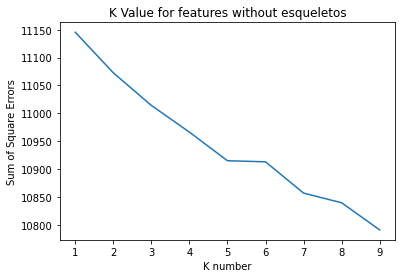

In [310]:
plt.plot(k_range,sse)
plt.xlabel("K number")
plt.ylabel("Sum of Square Errors")
plt.title("K Value for features without esqueletos")